In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
taxi = pd.read_csv('trip.csv')
taxi.info()
taxi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [180]:
taxi.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


### 결측치 처리하기

In [181]:
taxi.isna().sum()
# -> fare_amount 컬럼의 결측치는 전체 중 아주 적은 부분을 차지하므로 해당 행을 삭제해도 무방하나, 평균으로 대체하기로 결정.

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [182]:
### fare_amount 컬럼의 결측치를 평균으로 대체
taxi['fare_amount'] = taxi['fare_amount'].fillna(round(taxi['fare_amount'].mean(), 2))
taxi['fare_amount'].isna().sum()

np.int64(0)

### 이상치 처리하기

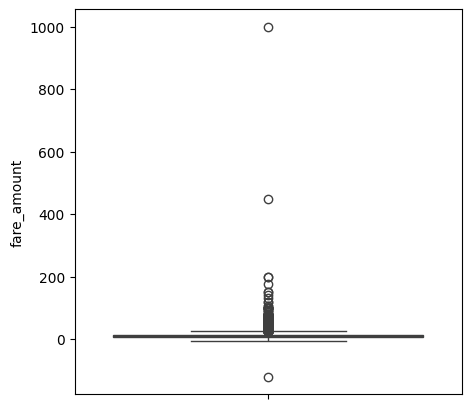

In [183]:
# 박스플롯
plt.figure(figsize=(5,5))
sns.boxplot(taxi['fare_amount'])
plt.show()

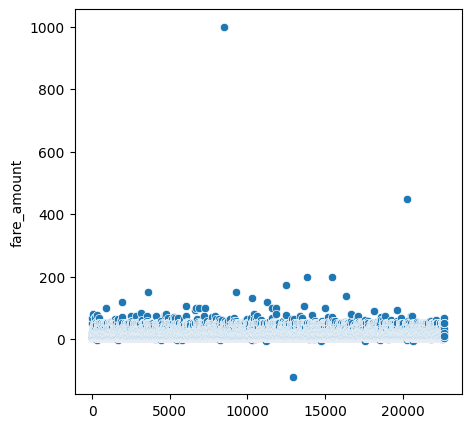

In [184]:
# 산점도
plt.figure(figsize=(5,5))
sns.scatterplot(taxi['fare_amount'])
plt.show()

In [185]:
### 박스플롯 및 산점도 확인 결과, 400 이상의 값은 이상치로 판단, 제거하기로 결정
# - 또한, 해당 컬럼이 요금 금액이므로 음수 값과 0도 이상치라고 판단하여 해당 값들은 모두 평균으로 대체하기로 결정

# 1. 400 이상의 값 제거하기
taxi = taxi[~(taxi['fare_amount'] > 400)]

# 2. 음수 값 0으로 대체하기
fare_mean = round(taxi['fare_amount'].mean(), 2)
taxi['fare_amount'] = taxi['fare_amount'].apply(lambda x : fare_mean if x <= 0 else x)

taxi.describe()

<ipython-input-185-896867795>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['fare_amount'] = taxi['fare_amount'].apply(lambda x : fare_mean if x <= 0 else x)


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.643597,2.913542,12.979899,1.827096,0.312542
std,1.304990,3.653132,11.089787,2.472531,1.399212
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.065000,14.500000,2.450000,0.000000
max,36.000000,33.960000,200.010000,55.500000,19.100000


### 중복치 처리하기

In [186]:
# 중복치 확인 시 행 단위 중복이 확인되었으므로 해당 행 삭제
taxi[taxi.duplicated()]
taxi = taxi.drop_duplicates()
taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


### 택시 탑승 및 하차 시간을 활용할 수 있을지

[힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?

In [187]:
### 택시 주행 시간 컬럼 생성하기
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

# 하차시간 - 승차시간 계산하여 컬럼 생성
taxi['driving_time'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']
# 계산 결과, 분 단위의 데이터이므로 `.dt.total_seconds()` 메소드를 사용하여 초 단위로 변환 후 60으로 나누어 분 단위의 데이터로 생성함
taxi['driving_time'] = (taxi['driving_time'].dt.total_seconds()/60).astype('int')
taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,14
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,26
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,7
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,16
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,4
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,11


### Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [188]:
# payment_method 컬럼의 값 분포 확인 결과, 'Cash', 'Debit Card', 'Credit Card' 세 가지의 값이 존재함
taxi['payment_method'].value_counts()

,count
payment_method,
Cash,11193
Debit Card,5783
Credit Card,5721


In [189]:
# 'Debit Card', 'Credit Card'를 통틀어서 'Card'라는 값으로 변환
taxi['payment_method'] = taxi['payment_method'].apply(lambda x: x if x == 'Cash' else 'Card')
taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,14
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,26
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,7
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,16
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,11
